# How has the Netflix TV show *The Queen's Gambit* impacted online chess?

**Author:** David Zhang **Email:** dyzhang32@gmail.com

---

The queen's gambit chess opening is played at the highest levels of chess, characterised by moves: **1.d4 d5 3.c4**. [*The Queen's Gambit*](https://en.wikipedia.org/wiki/The_Queen%27s_Gambit_(miniseries)) TV show depicts Beth Harmon, a chess prodigy who struggles with drug addiction, conquer a male-dominated chess world. 

It's no secret that the popularity of *The Queen's Gambit* has caused a [recent surge in chess interest](https://www.nytimes.com/2020/11/23/arts/television/chess-set-board-sales.html). In fact, I myself am one of the many victims, having been re-inspired to pick up online chess. Inevitably, this has snowballed into a bit of an addiction, having played [375 rapid games in the last month](https://www.chess.com/games/archive?gameOwner=my_game&gameType=live&gameTypeslive%5B%5D=rapid&rated=rated&endDate%5Bdate%5D=02/01/2021&startDate%5Bdate%5D=01/01/2021&timeSort=desc), with most of my games as white beginning with the queen's gambit when possible. 

This has lead me to wonder how many other's have been bitten by *The Queen's Gambit* bug and how this would be reflected in online chess. In particular, I expect this would be identifiable through the 3 following metrics: 
   
   1. An increase in the **number of new players** joining online chess websites. 
   2. An increase in the **popularity of the Queen's Gambit and Sicilian openings**. 
   3. An increase in the **re-uptake of chess by inactive users**. 
    
Here, I try to test these hypotheses using the [chess.com](https://www.chess.com/) data. 

### Importing modules

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Number of new players

*The Queen's Gambit* was released in the UK Netflix on the **23rd October 2020**. In order to see the impact of this on the number of players joining online chess, I'll use the chess.com API to download all the UK-associated players that have joined within a 4 month window before or after October 23rd. 

To begin, let's grab the joining date of all UK players. It's worth noting that we're limited by how accurately this reflects a user's country of residence during the period following *The Queen's Gambit* release.

In [2]:
# parse timestamps as date times
dp = lambda x: datetime.fromtimestamp(int(x))

join_dates = pd.read_csv("data/GB_players_joined_25_02_2021.csv", parse_dates = ["joined"], date_parser = dp)

join_dates.head()

,joined
0,2008-12-18 11:39:20
1,2011-01-05 18:28:41
2,2011-02-19 03:40:09
3,2012-11-30 13:40:17
4,2011-04-07 20:36:09


With the joining dates downloaded and formatted we can filter for those dates residing in our window of interest, marking the release date.

In [3]:
qg_date = datetime.strptime("2020-10-23", "%Y-%m-%d")
earliest = qg_date - relativedelta(months = 4)
latest = qg_date + relativedelta(months = 4)
join_dates_qg = join_dates[(join_dates["joined"] >= earliest) & (join_dates["joined"] <= latest)]

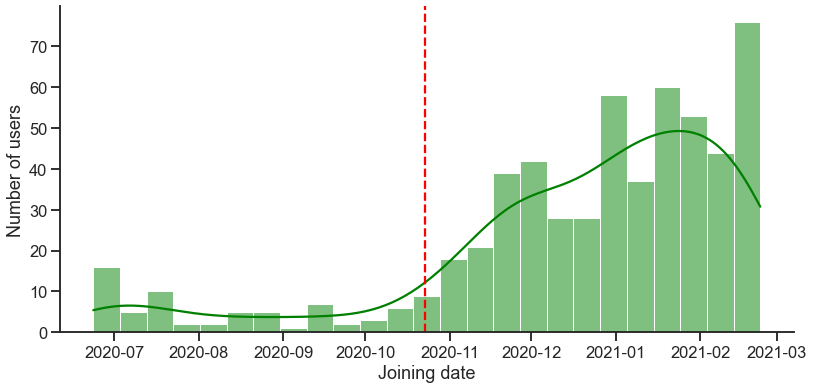

In [4]:
sns.set_style("ticks")
sns.set_context("talk")
joining_fig = sns.displot(
    data = join_dates_qg, 
    x = "joined", 
    bins = 25, 
    kde = True, 
    color = "g"
)
joining_fig.set(xlabel = "Joining date", ylabel = "Number of users")
joining_fig.fig.set_figwidth(15)
joining_fig.fig.set_figheight(6)
plt.axvline(qg_date, color = 'r', linestyle = "--")